# Data Science Against Gun Violence
## Using computer vision to aid in the detection of loaded firearms



For my [Insight Data Science Fellowship](https://www.insightdatascience.com/) project, I had the joy of consulting with company [Astral AR](http://www.astralar.com/). This tech start-up out of Austin, Texas is designing drones to stop bullets, literally. Their drones are not armed, but rather armored with a protective material that can pulverize bullets upon impact. They are designed to be robotic body guards, using AI to place themselves in between a gun and its intended target. Not only that, they can also be flown with "your mind" using augmented reality (AR); hence, the name of their company, Astral, as in [astral projection](https://en.wikipedia.org/wiki/Astral_projection).

The on-board imaging software is very advanced and uses some pretty cool machine learning to determine the trajectory of a bullet. However, I specifically worked on a separate sensor component: the Walabot. The [Walabot](https://walabot.com/makers) is an inexpensive, millimeter-wave (MMW), 3D sensor. It uses MMW to see through walls  and other solid objects (like those big sensors at the airport) that are transparent to radio frequencies. Its primary retail applications are for DIY home improvement, i.e., looking through walls to detect pipes and studs, as well as detecting human falls in the home and alerting family members and emergency responders for assistance. The Walabot is easily hackable. There are dozens of apps on GitHub that people have developed using the Walabot API; for example, it's popular for robotics as an automated collision detector.

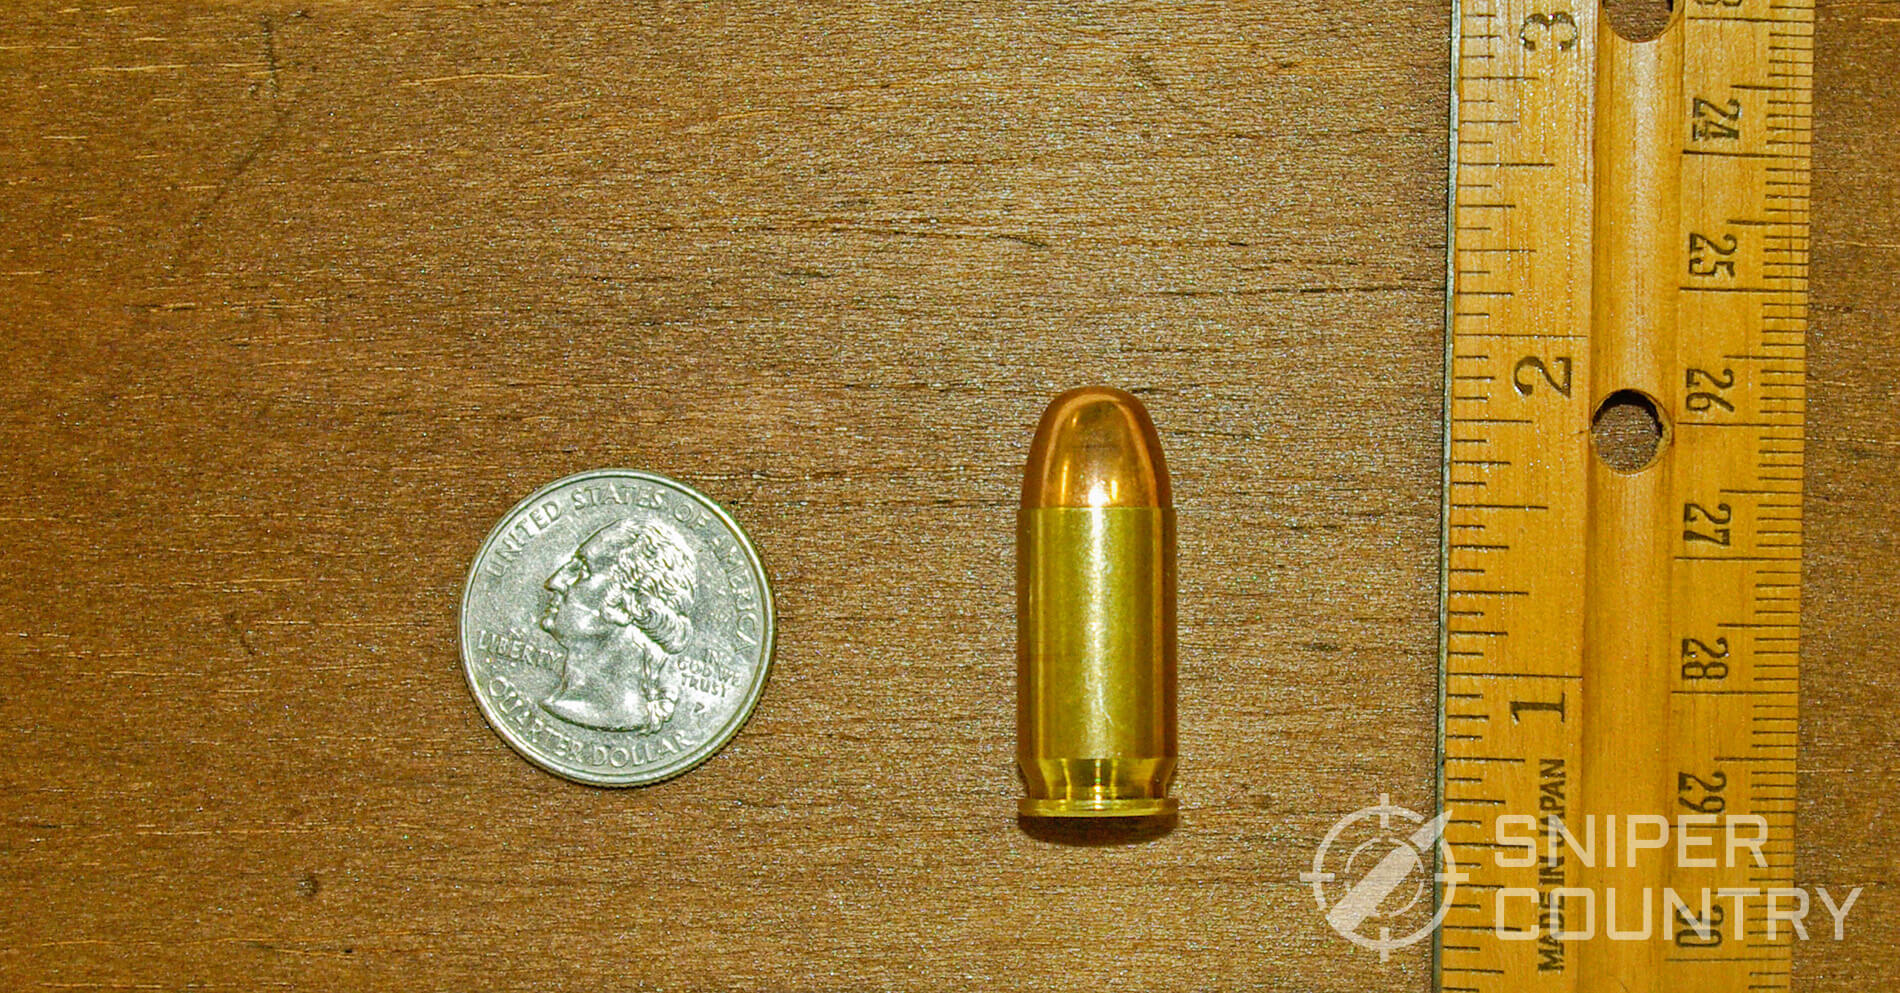

In [17]:
from IPython.display import Image
Image('https://www.snipercountry.com/wp-content/uploads/2018/10/45-ACP.jpg')

The Walabot sensor on the Astral AR drones will detect unseen firearms, as guns are metallic and thus very reflective. Ideally, this tech would be used to see guns behind walls, in vehicles, or concealed on a person. Additionally, the MMW tech can distinguish between practically harmless airsoft or toy guns and the very lethal real thing. However, the automated detection and identification needs a lot of work...which is where I come in. For my project, I was essentially starting from scratch at firearm detection, so the goal in the end was very simple: can we design an algorithm for the drone to automatically distinguish a loaded ammunition clip versus an unloaded clip.  While another valid problem is distinguishing between a gun versus anything else (like a [fatally misidentified cell phone](https://www.vox.com/2019/3/3/18248625/stephon-clark-sacramento-police-officers-shooting)), it is a problem that requires a lot more data than can be collected and analyzed in the time span required for my Insight project. Baby steps.

### Experimental design

The goal of the experiment is to use a computer algorithm to accurately distinguish a loaded .45 caliber ammunition clip from an unloaded clip. We chose .45 caliber ammunition as it is one of the most common types of handguns sold in the US.

*** Block showing diagram of experimental setup, along with actual picture.

In [3]:
rmin = 145
rmax = 155
rres = 0.1
thetamin = -60
thetamax = 60
thetares = 3
phimin = -15
phimax = 15
phires = 1
threshold = 1
mti = False

Before recording the data, it is necessary to set up the Walabot arena, the 3D 'box' in which the sensor will record data. We set up Walabot with a radial range from {{rmin}} to {{rmax}} cm with a resolution of {{0.1}} cm. The azimuthal angle that sweeps orthogonally to the vertical axis ranges from {{thetamin}} to {{thetamax}} deg with a resolution of {{thetares}} deg and the elevation angle measuring the angle vertically ranges from {{phimin}} to {{phimax}} with a resolution of {{phires}}. Polar coordinates are the native system for the Walabot sensor, as the reflections off objects in the arena return to the sensor radially.